# User Profile Segmentation

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

### Load data from excel sheet

In [29]:
fileIFlix = 'iflix users profiling - 15934.xlsx'
# Load spreadsheet
iflix = pd.ExcelFile(fileIFlix)
iflixUser = iflix.parse('Sheet1')
iflixUserOriginal = iflixUser

### Data Preprocessing for clustering

In [30]:
iflixUser['DATA_USAGE'] = iflixUser['DATA_USAGE'].fillna(iflixUser['DATA_USAGE'].mean())
iflixUser['DATA_ARPU'] = iflixUser['DATA_ARPU'].fillna(iflixUser['DATA_ARPU'].mean())

iflixUser['DATA_USAGE'] = iflixUser['DATA_USAGE'].apply(lambda x:iflixUser['DATA_USAGE'].mean() if x<=0 else x )
iflixUser['DATA_ARPU'] = iflixUser['DATA_ARPU'].apply(lambda x:iflixUser['DATA_ARPU'].mean() if x<=0 else x )

iflixUser=iflixUser[["DATA_USAGE","DATA_ARPU"]]

iflixUserNP = np.asarray(iflixUser)

#convert to log
iflixUserNP[:, [0]] = np.log(iflixUserNP[:, [0]])
iflixUserNP[:, [1]] = np.log(iflixUserNP[:, [1]])

### Specify parameters for Hyper parameter optimization

In [31]:
param_dist = {"init": ['k-means++', 'random'],
              "n_init": sp_randint(1, 20),
              "max_iter": sp_randint(300, 600),
              "n_clusters":sp_randint(1, 10)}

### Define k-means 

In [32]:
kmeans = KMeans()

### Run randomized search

In [33]:
n_iter_search = 50
random_search = RandomizedSearchCV(kmeans, param_distributions=param_dist,n_iter=n_iter_search)
random_search.fit(iflixUserNP)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KMeans(algorithm='auto', copy_x=True,
                                    init='k-means++', max_iter=300,
                                    n_clusters=8, n_init=10, n_jobs=None,
                                    precompute_distances='auto',
                                    random_state=None, tol=0.0001, verbose=0),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'init': ['k-means++', 'random'],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002301FFC2DA0>,
                                        'n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002301FFC2AC8>,
                                        'n_init': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002301FFC2FD0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

### Build  k-means clustering model using optimized parameters

In [34]:
# Initializing KMeans
kmeans = KMeans(init = random_search.best_params_.get('init'), n_init = random_search.best_params_.get('n_init'), max_iter = random_search.best_params_.get('max_iter'),n_clusters = random_search.best_params_.get('n_clusters'))
# Fitting with inputs
kmeans = kmeans.fit(iflixUserNP)

### Predicting the clusters

In [35]:
labels = kmeans.predict(iflixUserNP)

### Getting the cluster centers and Visulization

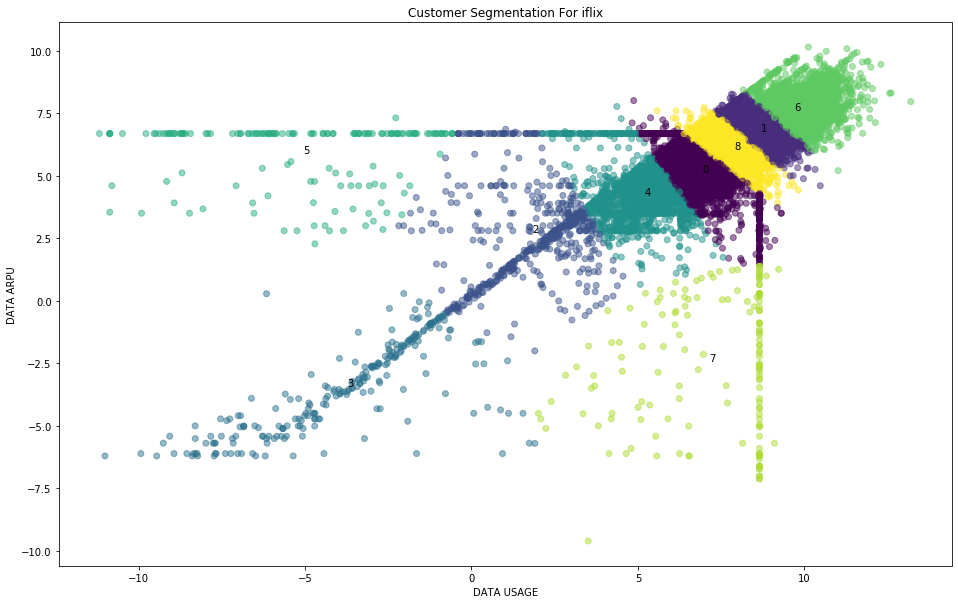

In [38]:
C = kmeans.cluster_centers_
fig = plt.figure(2,figsize=(16, 10))
plt.scatter(iflixUserNP[:, 0], iflixUserNP[:, 1], c=labels.astype(np.float),alpha=0.5)
clusterNo = 0
for cluster in C:
    plt.text(C[:, 0][clusterNo], C[:, 1][clusterNo], str(clusterNo), None)
    clusterNo += 1

plt.xlabel('DATA USAGE')
plt.ylabel('DATA ARPU')
plt.title('Customer Segmentation For iflix')
plt.show()

In [39]:
iflixUser['CLUSTER']=labels


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
